In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data=pd.read_csv('./Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
x=data.iloc[:,1:2]
y=data.iloc[:,2]
X=x

In [4]:
linreg=LinearRegression()
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
polyreg=PolynomialFeatures(degree=2)
xpoly=polyreg.fit_transform(x)
xpoly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [6]:
polyreg2=PolynomialFeatures(degree=3)
xpoly2=polyreg2.fit_transform(X)
xpoly2

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [7]:
linreg2=LinearRegression()
linreg2.fit(xpoly,y)
linreg3=LinearRegression()
linreg3.fit(xpoly2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

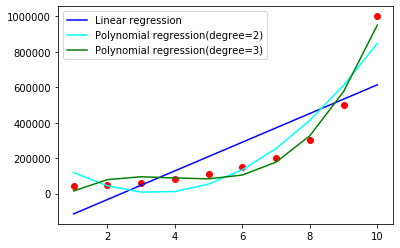

In [8]:
plt.scatter(x,y,color='red')
plt.plot(x,linreg.predict(x),color='blue',label="Linear regression")
plt.plot(x,linreg2.predict(xpoly),color='cyan',label="Polynomial regression(degree=2)")
plt.plot(x,linreg3.predict(xpoly2),color='green',label="Polynomial regression(degree=3)")
plt.legend(loc='best')

In [9]:
a=np.array(8.5)
a1=[[1,8.5,8.5**2]]
a2=[[1,8.5,8.5**2,8.5**3]]
print('Prediction from:\nLinear Model:',linreg.predict(a.reshape(1,-1)),'\nPolynomial Model (Degree=2):',linreg2.predict(a1),'\nPolynomial Model (Degree=3):',linreg3.predict(a2))

Prediction from:
Linear Model: [492136.36363636] 
Polynomial Model (Degree=2): [506710.22727273] 
Polynomial Model (Degree=3): [436875.43706294]
